<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" width= 800 /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Ayudantía 4: Códigos útiles para la tarea 1</h1>

<H3 align='center'> MAT281 2024-2 </H3>

<H3 align='center'> Ayud. Diego Astaburuaga C. </H3>

<hr style="height:2px;border:none"/>

A modo de guía o *toolkit*, puede hallar aquí algunos códigos que pueden serle de utilidad para la realización de la primera tarea del curso.

In [188]:
# manejo de datos
import pandas as pd

# visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# ciencia de datos
from scipy.stats import kurtosis
from sklearn import datasets #datasets.load_iris()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore") # to ignore warnings


## Cargando el conjunto de datos

Para ejemplicar los códigos y como se utilizan, utilizaremos el conocido set de datos [iris](https://www.kaggle.com/datasets/uciml/iris).

In [189]:
#cargar conjunto de datos
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

Observemos el set de datos.

In [190]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [191]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [192]:
print(f"El nombre de las variables 0,1,2 es:\n{iris.target_names}")

El nombre de las variables 0,1,2 es:
['setosa' 'versicolor' 'virginica']


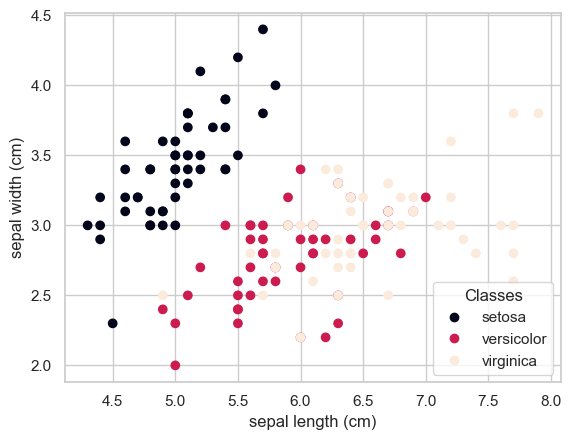

In [193]:
_, ax = plt.subplots()
scatter = ax.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [194]:
target_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['target'] = iris_df['target'].map(target_mapping)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Explorando el conjunto de datos

Revisemos el número de observaciones en el conjunto de datos y cuantas corresponden a que etiqueta o *target*.

In [195]:
print(f"El conjunto de datos cuenta con {iris_df.shape[0]} observaciones.")

El conjunto de datos cuenta con 150 observaciones.


Uno puede ocupar lo que sabe y entregar el resultado con el siguiente código:

In [196]:
for target in iris_df["target"].unique():
    temp = iris_df[iris_df["target"]==target]
    print(f"Para la etiqueta {target} hay {temp.shape[0]} observaciones.")

Para la etiqueta setosa hay 50 observaciones.
Para la etiqueta versicolor hay 50 observaciones.
Para la etiqueta virginica hay 50 observaciones.


O puede leer un poco más y hallar una función que cumple nuestro proposito:

In [197]:
iris_df['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Por lo general es más informativo generar un gráfico adecuado para visualizar la distribución de los *target*:

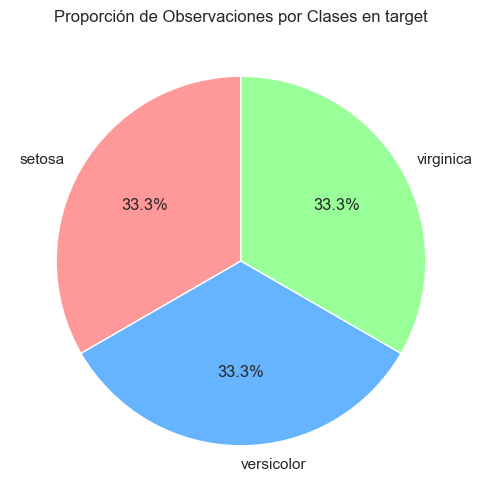

In [198]:
class_counts = iris_df['target'].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])  # Generamos la gráfica
plt.title('Proporción de Observaciones por Clases en target')
plt.show()

Aprovechando múltiples *plot*, podemos ver distintas formas de representar lo que queremos mostrar:

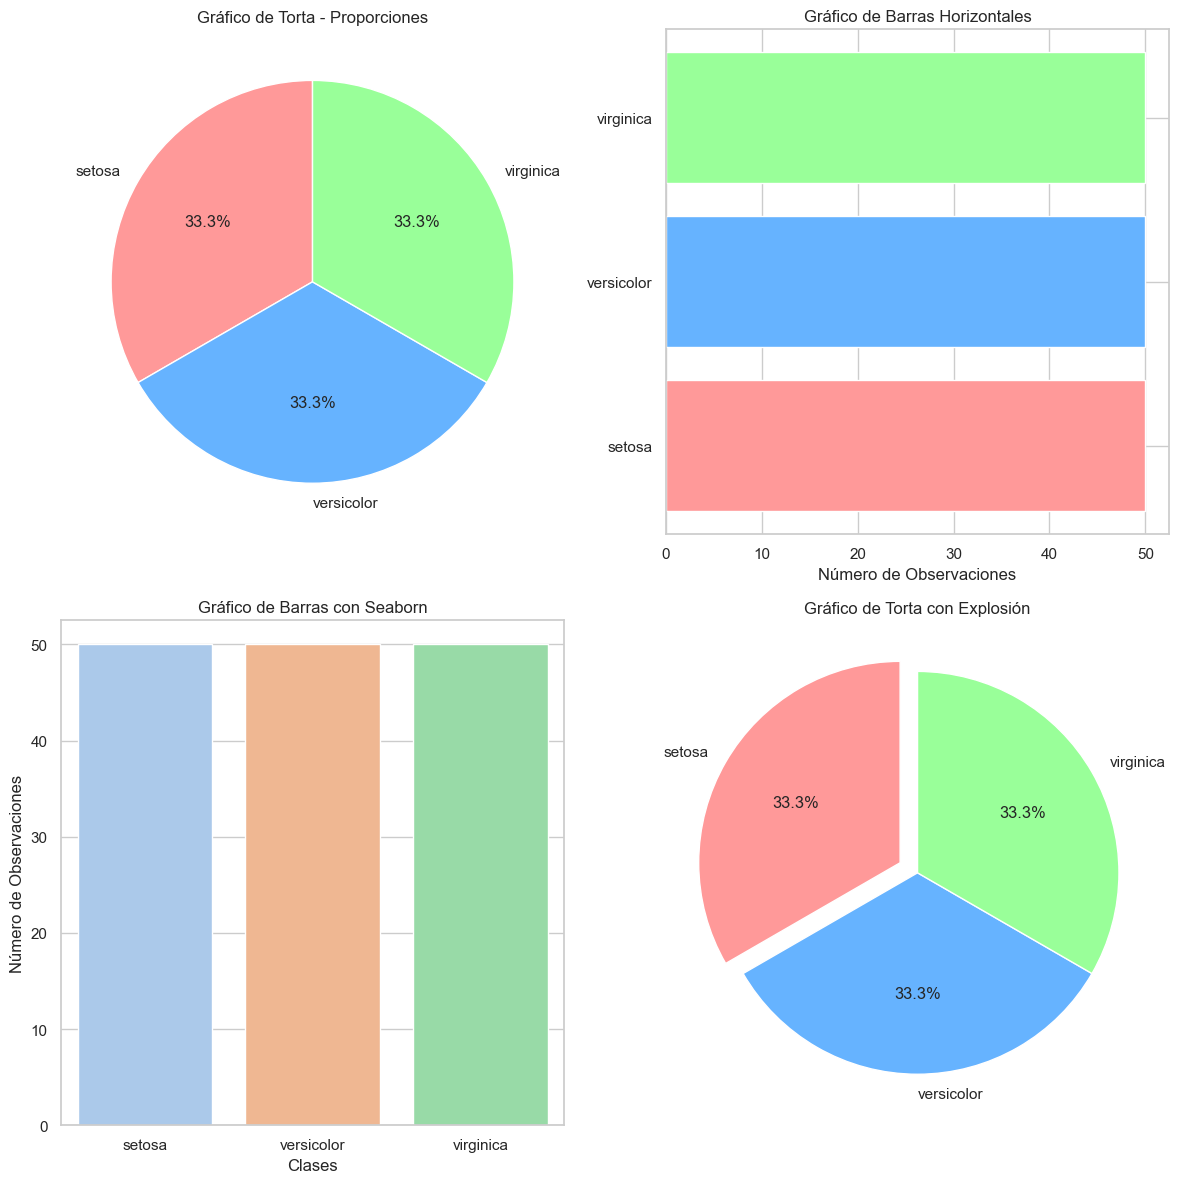

In [199]:

class_counts = iris_df['target'].value_counts()

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Gráfico de Torta - Proporciones')

plt.subplot(2, 2, 2)
plt.barh(class_counts.index, class_counts, color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gráfico de Barras Horizontales')
plt.xlabel('Número de Observaciones')

plt.subplot(2, 2, 3)
sns.barplot(x=class_counts.index, y=class_counts, palette='pastel')
plt.title('Gráfico de Barras con Seaborn')
plt.ylabel('Número de Observaciones')
plt.xlabel('Clases')

plt.subplot(2, 2, 4)
explode = (0.1, 0, 0) 
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Gráfico de Torta con Explosión')

plt.tight_layout()
plt.show()

Revisemos la distribución de las covariables, teniendo en cuenta los distintos *target* o etiquetas. Como son variables númericas, es de valor incluir algunos cálculos estadísticos.

Sobre los histogramas:

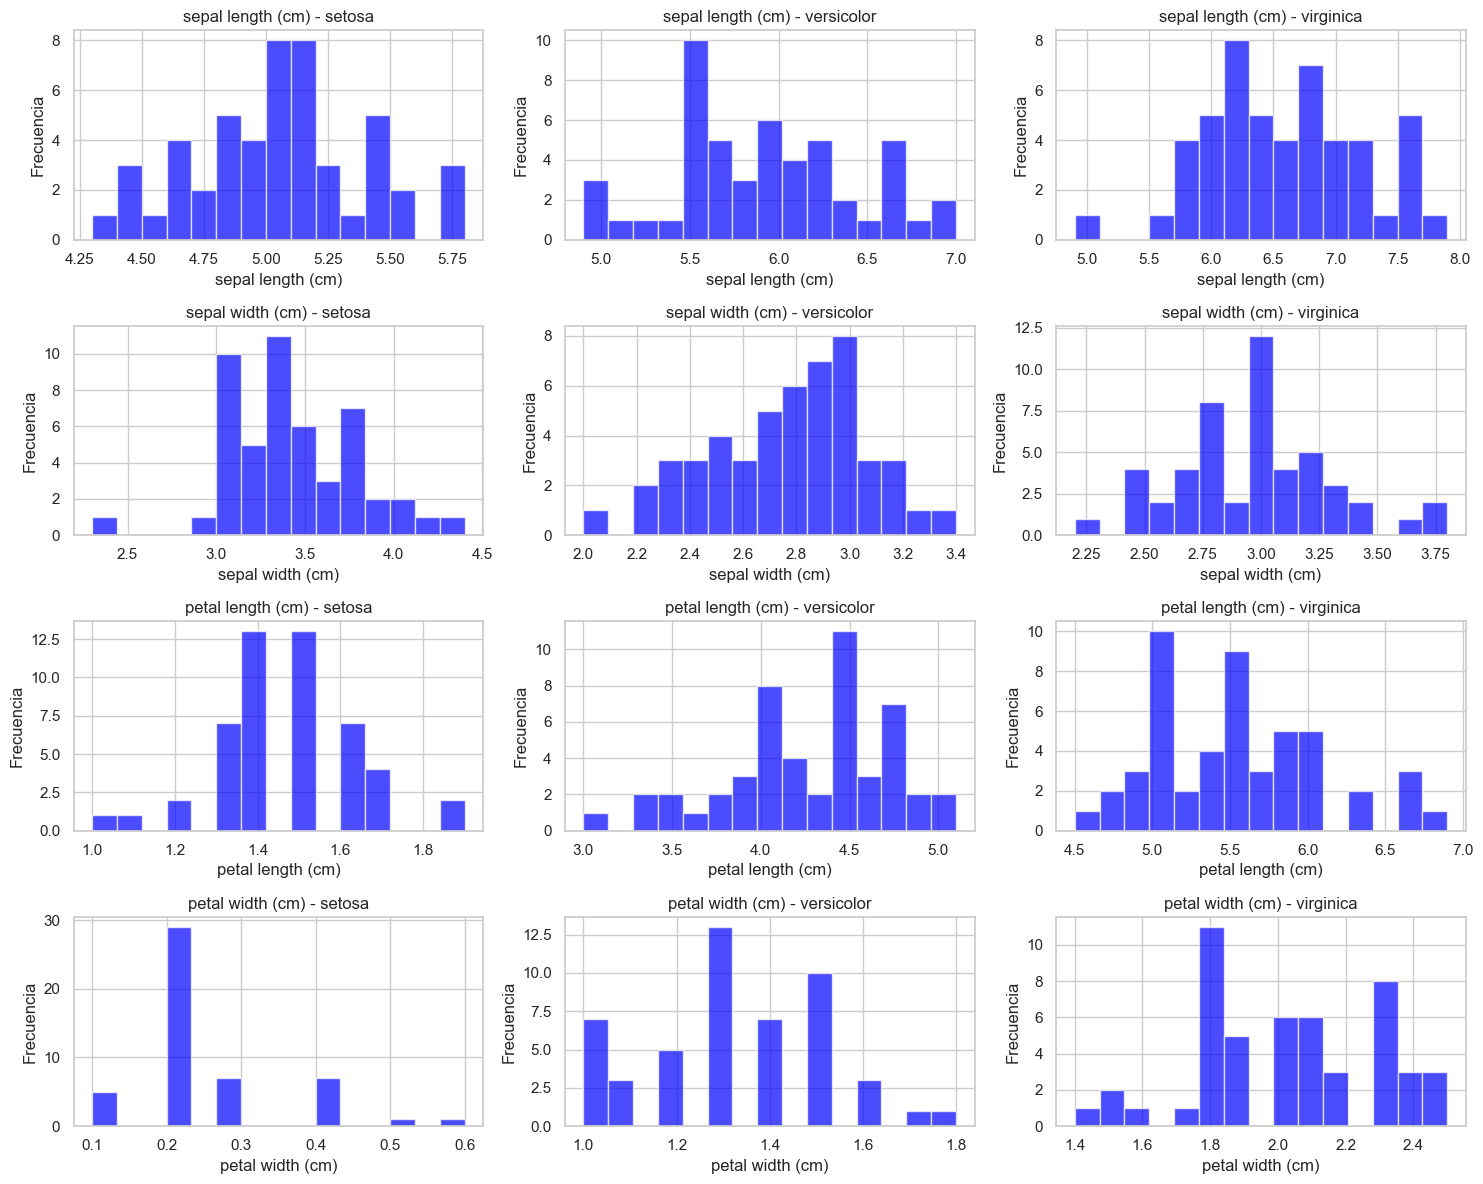

In [200]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

for i, covariate in enumerate(iris.feature_names):
    for j, specie in enumerate(iris.target_names):
        
        ax = axes[i, j]
        
        data = iris_df[iris_df['target'] == specie][covariate]
        
        ax.hist(data, color='blue', alpha=0.7, bins=15)
        
        ax.set_title(f'{covariate} - {specie}')
        ax.set_xlabel(covariate)
        ax.set_ylabel('Frecuencia')


plt.tight_layout()
plt.show()

También se puede hacer con seaborn...

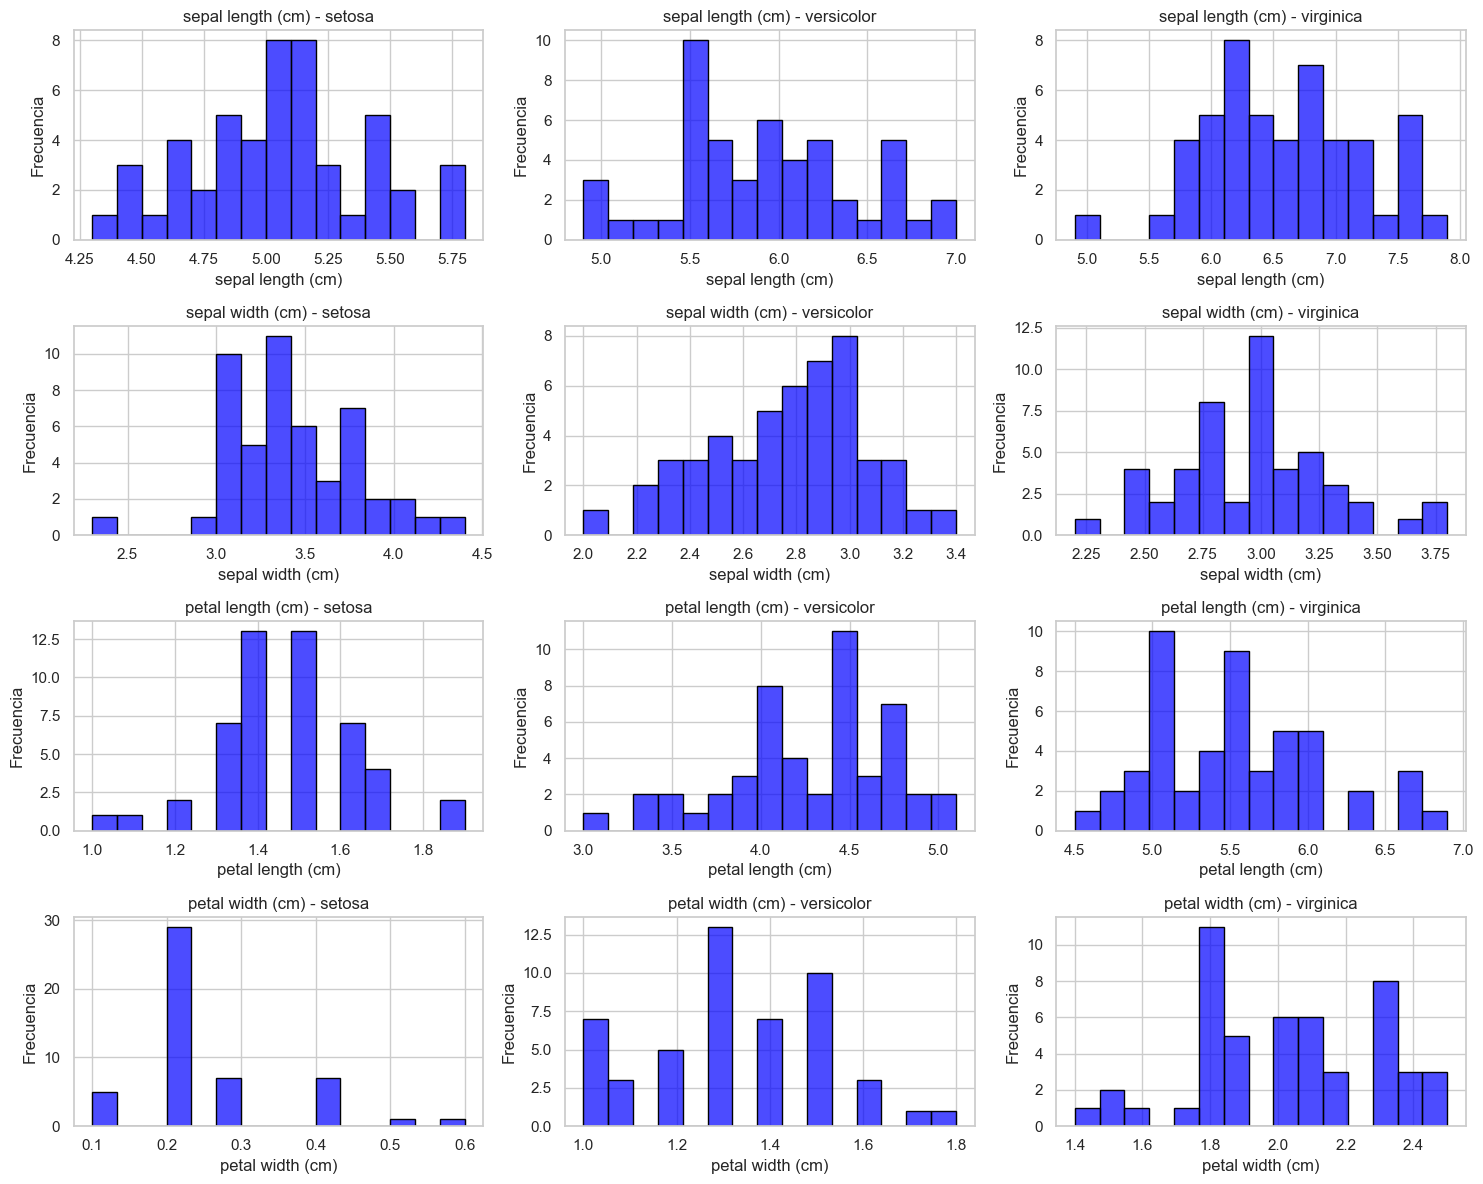

In [201]:
# sns config
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

for i, covariate in enumerate(iris.feature_names):
    for j, specie in enumerate(iris.target_names):
        ax = axes[i, j]
        
        data = iris_df[iris_df['target'] == specie][covariate]

        sns.histplot(data, bins=15, color='blue', kde=False, ax=ax, edgecolor="black", alpha=0.7)
        
        ax.set_title(f'{covariate} - {specie}')
        ax.set_xlabel(covariate)
        ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Algunos boxplot informativos:

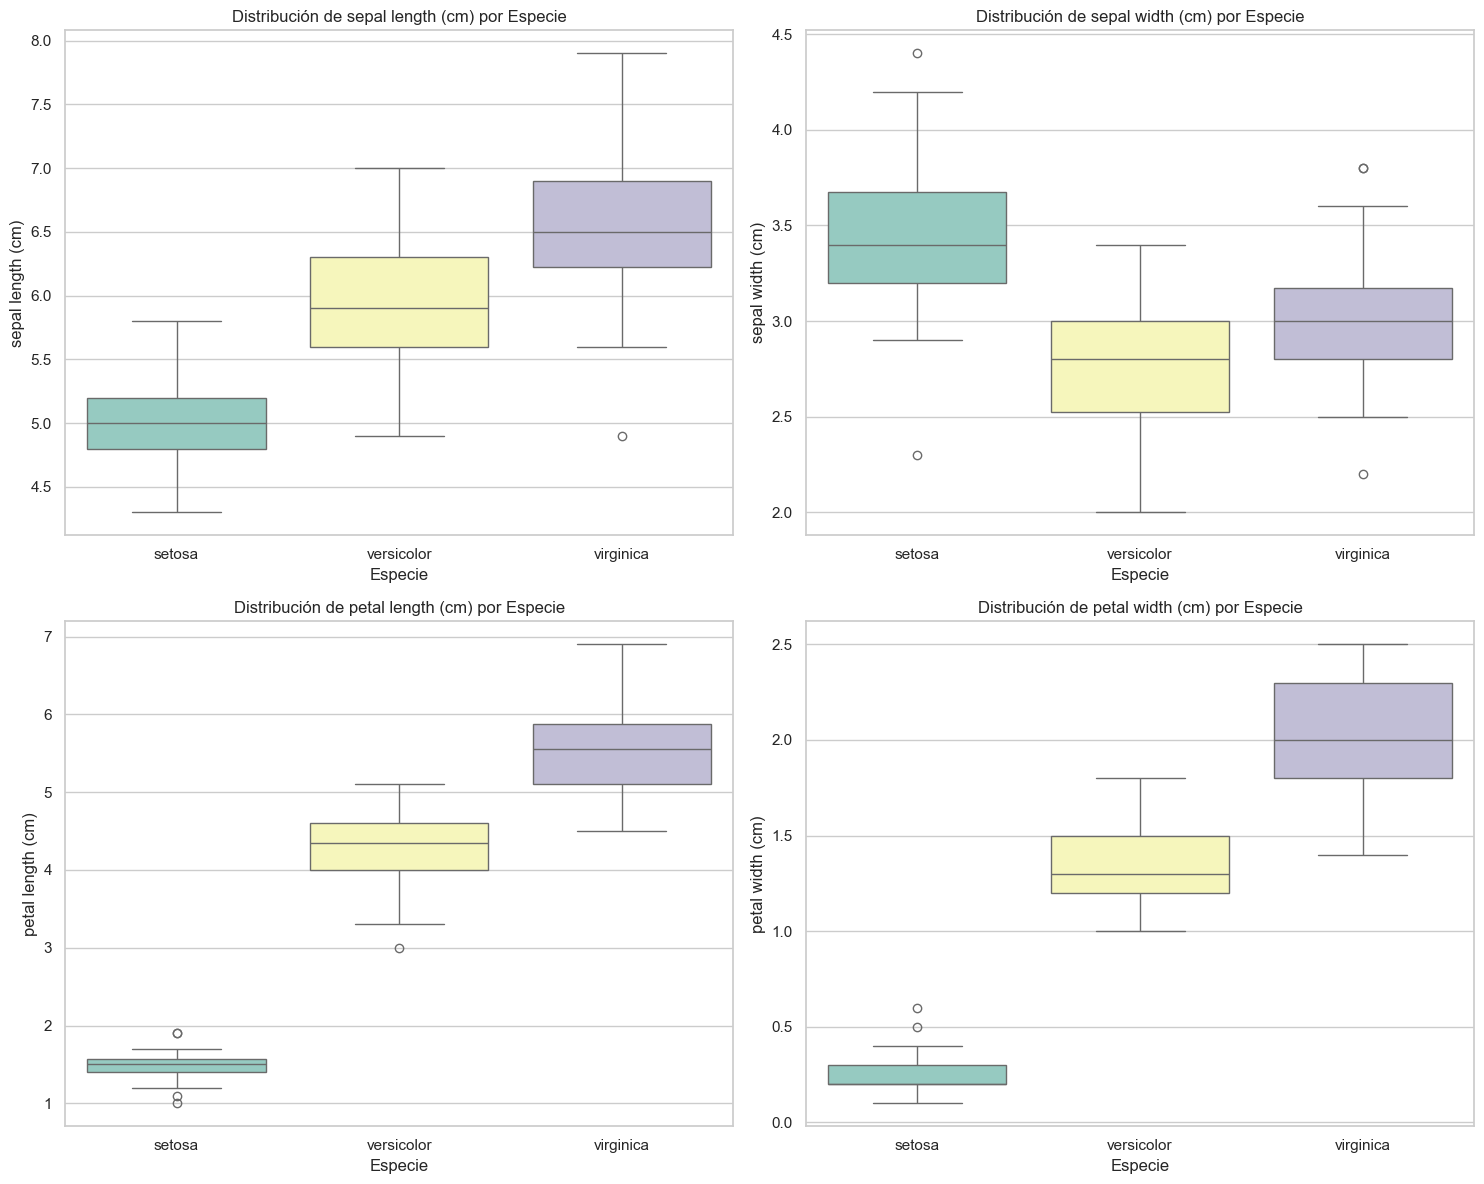

In [202]:
# Crear la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Lista de covariables
covariates = iris.feature_names

# Generar boxplots
for i, covariate in enumerate(covariates):
    ax = axes[i // 2, i % 2]
    
    # Crear el boxplot
    sns.boxplot(x='target', y=covariate, data=iris_df, ax=ax, palette="Set3")
    
    # Añadir título y etiquetas
    ax.set_title(f'Distribución de {covariate} por Especie')
    ax.set_xlabel('Especie')
    ax.set_ylabel(covariate)

# Ajustar el layout
plt.tight_layout()
plt.show()


> ¿Algo que le parezca curioso de los gráficos?

Además, podemos incluir otras medidas importantes como las de tendencia central, dispersión y forma. Aprovechamos que la función *.describre()* entrega casi todas estas carácteristicas, solo resta incluir la curtosis.

In [203]:
info = iris_df.drop('target', axis=1).describe().T
info['kurtosis'] = iris_df.drop('target', axis=1).apply(kurtosis).values

info

,count,mean,std,min,25%,50%,75%,max,kurtosis
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,-0.573568
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,0.180976
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,-1.395536
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,-1.336067


Finalmente, también es de valor podemos estudiar las relaciones que existen entre las distintas covariables, si es que están estan correlacionadas, si nos permiten distiguir alguna información de valor a priori o cualquier otro *insight* que pueda ser de apoyo para continuar con el análisis.

Observemos como la función *pairplot* de *seaborn* permite de manera muy sencilla visualizar los histogramas separados según el *target* y también hacer gráficos de dispersión de variable contra variable.

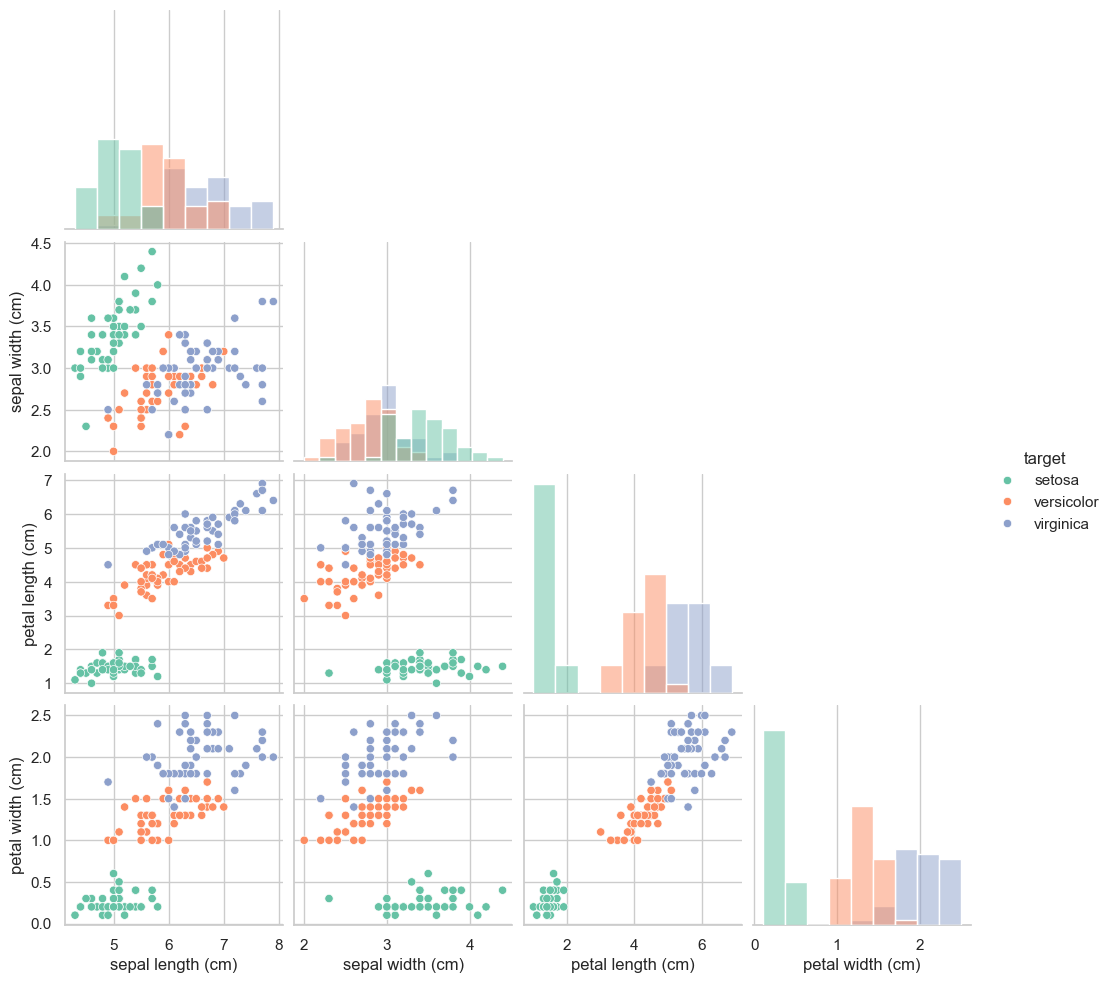

In [204]:
sns.pairplot(iris_df, hue="target", palette="Set2", diag_kind='hist', height=2.5, corner = True);

Existiendo también otros diseños y modificaciones para el código...

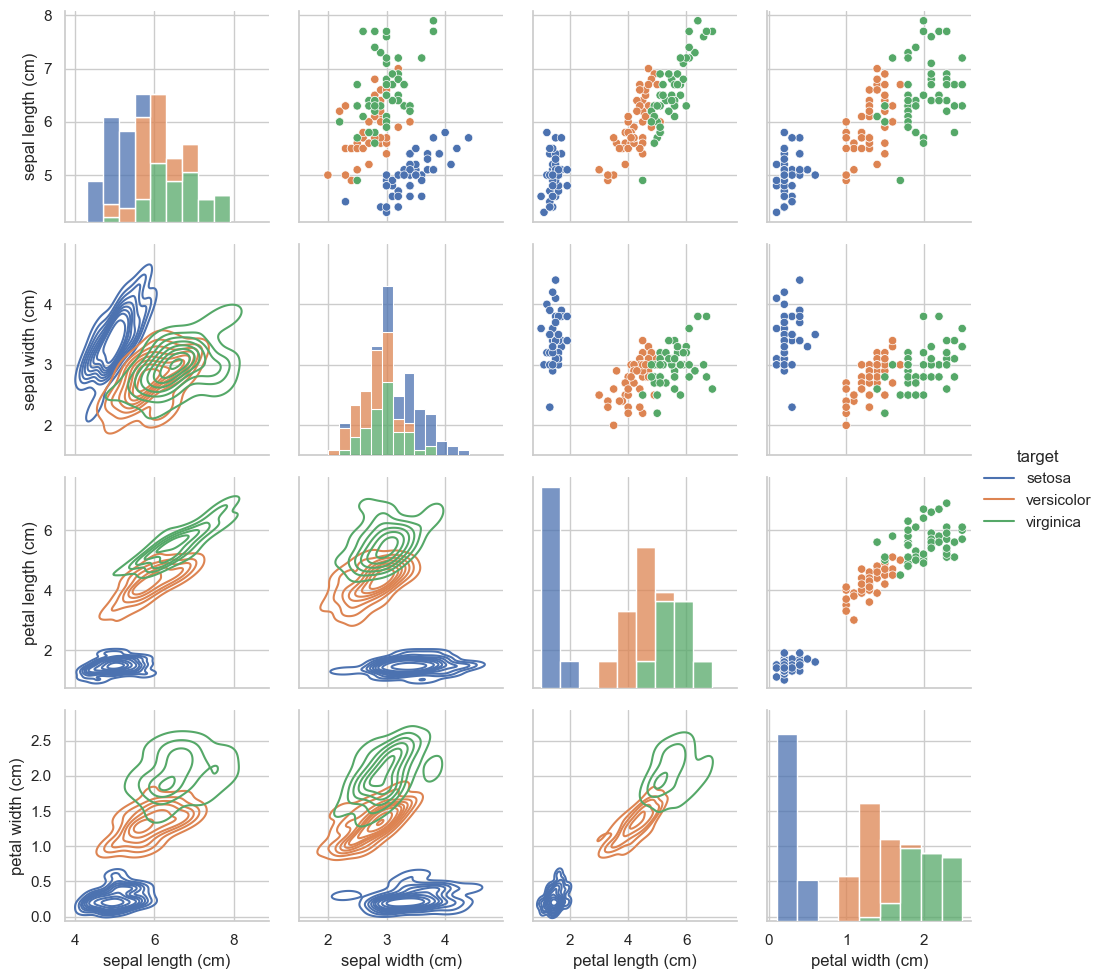

In [205]:
g = sns.PairGrid(iris_df, hue='target')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, multiple="stack")
g.add_legend();

## Implementación de modelos

Por temas de simpleza, se implementa el modelo de regresión logística. Para el resto de modelos, el procedimiento es el mismo, solo deben tener en cuenta que los parámetros para cada modelo son únicos y que su forma de visualizarlo (en caso de poder) también.

In [227]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [228]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [230]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [232]:
param_grid = [
    # El nombre de las keys debe ser exactamente el nombre del argumento que recibe el modelo
    {'penalty': ['l1', 'l2']},
    {'penalty' : ['elasticnet'],
     'l1_ratio': [0.2, 0.5, 0.8]
    }
]

logit = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200)
 
best_logit = GridSearchCV(logit, param_grid, cv=5, scoring='accuracy')
 
best_logit.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'l1_ratio': [0.2, 0.5, 0.8],
                          'penalty': ['elasticnet']}],
             scoring='accuracy')

In [233]:
best_logit.best_estimator_

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

In [234]:
best_logit.best_params_

{'penalty': 'l1'}

In [235]:
# best_logit.cv_results_

In [236]:
y_pred = best_logit.predict(X_test)

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [238]:
target_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['target'] = iris_df['target'].map(target_mapping)

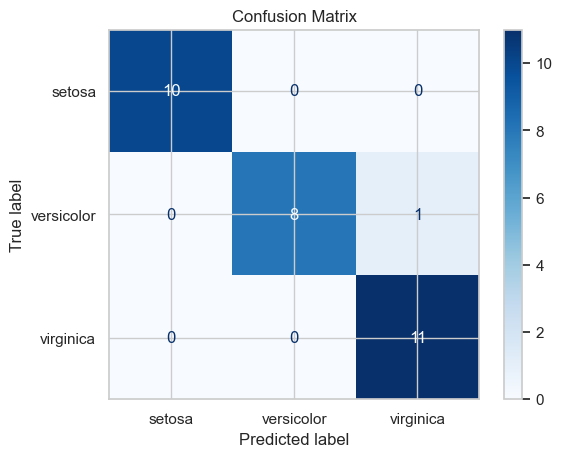

In [239]:
ConfusionMatrixDisplay.from_estimator(
    best_logit,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    display_labels=iris.target_names
)
plt.title('Confusion Matrix');

# Referencias
- [Iris dataset en scikit](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
- [Ayudantía 7 de Alejandro](https://github.com/AlejandroVillazonG/ayudantias_MAT281/blob/main/ayudantias_2023/Ayud7_MAT281_sklearn_1.ipynb).
- [Un amigo](https://chatgpt.com/).